In [22]:
%load_ext autoreload
%autoreload 2
from jax.random import PRNGKey, split
from jax import vmap, jit
from matplotlib import pyplot as plt
from eight_school import eight_school, InferenceEightSchool, initialize_model
from jax.tree_util import tree_map
from jax import numpy as jnp
import numpy as onp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
tau, mu, theta, sigma ,y = vmap(eight_school)(split(PRNGKey(0),1000000))

list(map(lambda x: (x.mean().item(),x.std().item()), (tau, mu, theta, sigma ,y)))

In [40]:
idx = jnp.abs(mu)<0.05
tau,mu,theta,sigma,y = tau[idx],mu[idx],theta[idx],sigma[idx],y[idx]

In [18]:
m = initialize_model(0,'eight_school_chkpts/',PRNGKey(0))

In [19]:
f = jit(m.rsample)

In [41]:
tau_hat, mu_hat, theta_hat, sigma_hat = vmap(f)(y,split(PRNGKey(0),y.shape[0]))

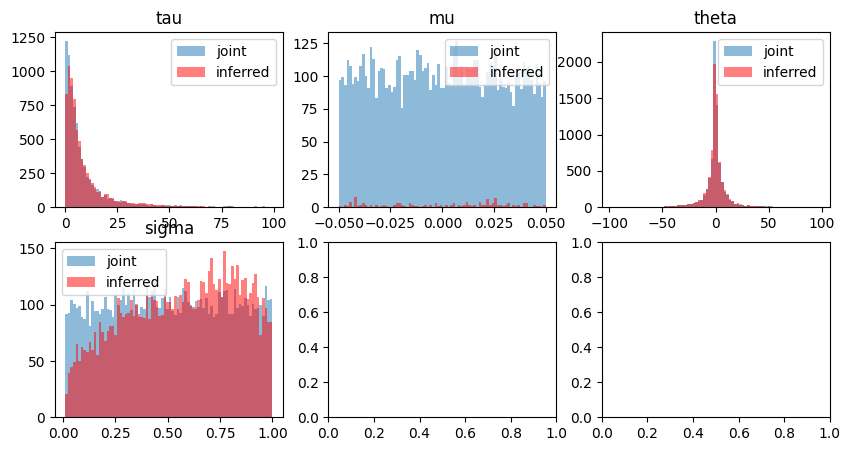

In [42]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i,(z,z_) in enumerate([(tau,tau_hat),(mu,mu_hat),(theta[:,1],theta_hat[:,1]),(sigma[:,1],sigma_hat[:,1])]):
    col = i % 3
    row = 0 if i <= 2 else 1
    _ ,bins, _ = axs[row,col].hist(onp.array(z[jnp.abs(z)<100]), bins = 80, alpha=0.5, label='joint')
    _ = axs[row,col].hist(onp.array(z_[jnp.abs(z)<100]), bins = bins, alpha=0.5, color='red', label='inferred')
    axs[row,col].legend()
    axs[row,col].title.set_text(['tau','mu','theta','sigma'][i])

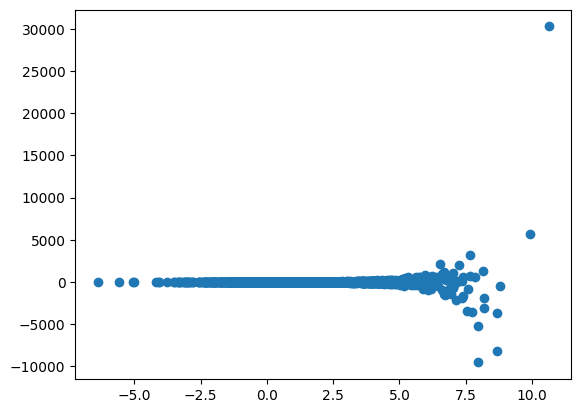

In [44]:
plt.scatter(jnp.log(tau_hat),theta_hat[:,0])